In [2]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env
from panav.RRT.RRT import RRT_plan
import shapely
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

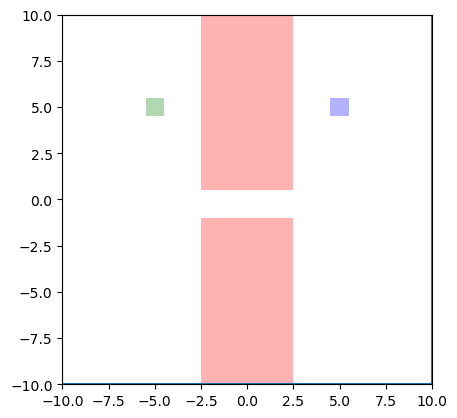

In [3]:

start_locs = np.array([[5,5]])
goal_locs = np.array([[-5,5]])


start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

starts = [box_2d_center(s,start_box_side) for s in start_locs]

goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,[O1,O2],starts,goals)

draw_env(env)

# The RRT algorithm: LaValle 1998

In [12]:
plan,T = RRT_plan(env,start_locs[0],bloating_r,eta = 0.2)


In [13]:
from panav.SAMP import Tube_Planning
vmax = 0.1
Tube_Planning(env,starts[0],goals[0],vmax,bloating_r,\
                                 [])

(array([ -0.     ,   0.     ,   0.     ,   0.     ,   0.     ,  63.63961,
         63.63961,  63.63961, 148.49242, 148.49242, 212.13203]),
 array([[ 5.5,  5.5,  5.5,  5.5,  5.5,  3. ,  3. ,  3. , -3. , -3. , -4.5],
        [ 4.5,  4.5,  4.5,  4.5,  4.5,  0. ,  0. ,  0. ,  0. ,  0. ,  4.5]]))

In [14]:
plan = np.array(plan)

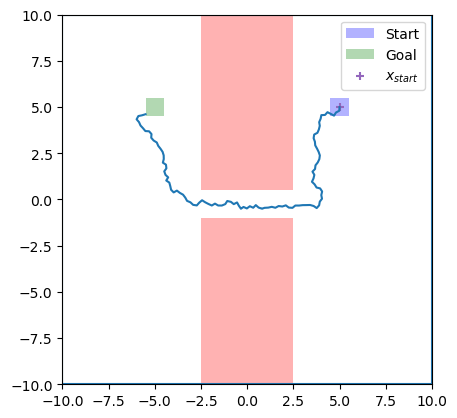

In [15]:


ax = plt.gca()

draw_env(env,ax=ax)

ax.scatter(*start_locs[0],marker = "+",label = r'$x_{start}$')

ax.plot(plan[:,0],plan[:,1])
# draw_rrt(ax,T)
ax.legend()
plt.show()
